In [242]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
def make_X(mu, sigme, size):
    X = np.random.multivariate_normal(mu, sigme, size)
    return X

In [244]:
def identification_boundary(XX, mu, sigma, pi):
    sigma1 = sigma[0]
    sigma2 = sigma[1]
    mu1 = mu[0]
    mu2 = mu[1]
    pi1 = pi[0]
    pi2 = pi[1]
    
    S = np.linalg.inv(sigma1) - np.linalg.inv(sigma2)
    cT = mu2.T.dot(np.linalg.inv(sigma2)) - mu1.T.dot(np.linalg.inv(sigma1))
    F = mu1.T.dot(np.linalg.inv(sigma1)).dot(mu1) - mu2.T.dot(np.linalg.inv(sigma2)).dot(mu2) + (np.log(np.linalg.det(sigma1)/np.linalg.det(sigma2))) - (2*np.log(pi1/pi2))
    
    return XX.T.dot(S).dot(XX) + (2*cT.reshape(1,2).dot(XX)) + F

mu= glu    110.825820
bmi     30.876434
dtype: float64
sigma= [[616.82175497  20.02771443]
 [ 20.02771443  43.20706159]]
mu= glu    142.488636
bmi     35.371970
dtype: float64
sigma= [[878.76793121  11.12705669]
 [ 11.12705669  43.92149268]]


<a list of 6 text.Text objects>

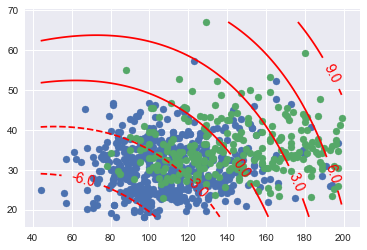

In [245]:
from sklearn import datasets

diabetes = pd.read_table("https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/pima-indians-diabetes.txt")

df = diabetes.rename(columns={"OralGluTol":"glu", "BMI":"bmi", "Class":"type"})
df = df[ (df["glu"] > 0) & (df["bmi"] > 0) ]

data = df[["glu", "bmi"]]
X1 = data[df["type"] == 0]
X2 = data[df["type"] == 1]

pi1 = int(len(X1))/ int(len(X1)+len(X2))
pi2 = 1 - pi1

X = np.vstack((X1,X2))

plt.scatter(X1["glu"], X1["bmi"])
plt.scatter(X2["glu"], X2["bmi"])

mu1 = X1.mean(axis=0)
print("mu=",mu1)
sigma1 = np.cov(X1.T)
print("sigma=",sigma1)

mu2 = X2.mean(axis=0)
print("mu=", mu2)
sigma2 = np.cov(X2.T)
print("sigma=", sigma2)

XX1 = np.linspace(df["glu"].min(), df["glu"].max(), 100)
XX2 = np.linspace(df["bmi"].min(), df["bmi"].max(), 100)

XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))

T = identification_boundary(XX_grid, (mu1, mu2), (sigma1, sigma2), (pi1, pi2))
T = np.diag(T)

cont = plt.contour(XX1, XX2, T.reshape(100,100), colors='r')
cont.clabel(fmt='%1.1f', fontsize=14)

In [246]:
def zscore(x):
    xmean = x.mean(axis=0)
    xstd = np.std(x,axis=0)
    return (x - xmean) / xstd

In [247]:
def make_data(mu, sigma, pi, z_score=False, decorrelation=False, distribution=False):
    sigma1 = sigma[0]
    sigma2 = sigma[1]
    mu1 = mu[0]
    mu2 = mu[1]
    pi1 = pi[0]
    pi2 = pi[1]

    if z_score:
        X1 = zscore(make_X(mu1, sigma1, int(size*pi1)))
        X2 = zscore(make_X(mu2, sigma2, int(size*pi2)))
    else:
        X1 = make_X(mu1, sigma1, int(size*pi1))
        X2 = make_X(mu2, sigma2, int(size*pi2))
    
    if decorrelation:
        ramda1, S1 = np.linalg.eig(sigma1)
        ramda2, S2 = np.linalg.eig(sigma2)
        X1 = np.dot(S1.T, X1.T).T
        X2 = np.dot(S2.T, X2.T).T
    
    X = np.vstack((X1,X2))

    plt.scatter(X[:,0], X[:,1])

    if not distribution:
        mu1 = X1.mean(axis=0)
        sigma1 = np.cov(X1.T)
        mu2 = X2.mean(axis=0)
        sigma2 = np.cov(X2.T)
    
    XX1 = np.linspace(X[:,0].min(),X[:,0].max(),100)
    XX2 = np.linspace(X[:,1].min(),X[:,1].max(),100)
    XX1_grid, XX2_grid = np.meshgrid(XX1, XX2)
    XX_grid = np.vstack((XX1_grid.flatten(),XX2_grid.flatten()))

    T = identification_boundary(XX_grid, (mu1, mu2), (sigma1, sigma2), (pi1, pi2))
    T = np.diag(T)

    return XX1, XX2, T.reshape(100,100)

<a list of 6 text.Text objects>

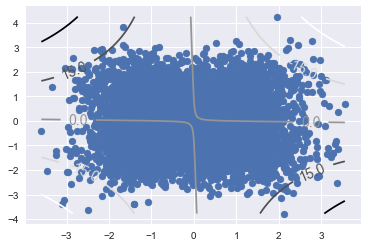

In [248]:
mu1 = np.array([-50, -50])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, -50], [-50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), z_score=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%1.1f', fontsize=14)

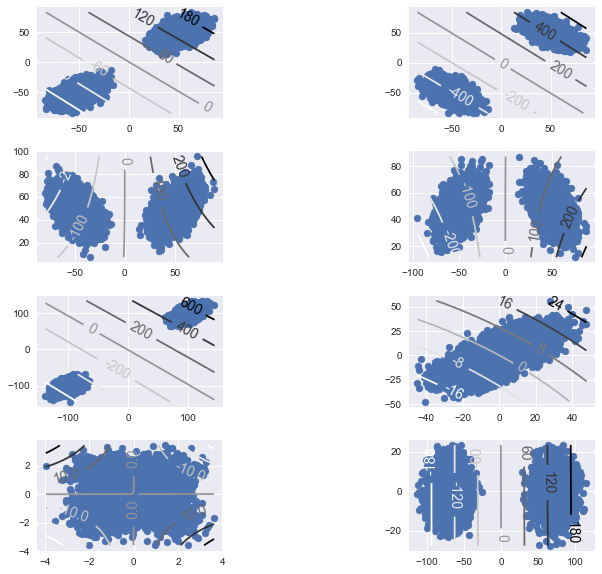

In [249]:
size = 10000


plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=1, hspace=0.3)


#1
plt.subplot(4, 2, 1)

mu1 = np.array([-50, -50])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2))

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#2
plt.subplot(4, 2, 2)
        
mu1 = np.array([-50, -50])
sigma1 = np.array([[100, -50], [-50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, -50], [-50, 100]])
pi2 = 1 - pi1

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2))

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#3
plt.subplot(4, 2, 3)
        
mu1 = np.array([-50, 50])
sigma1 = np.array([[100, -50], [-50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2))

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#4
plt.subplot(4, 2, 4)
        
mu1 = np.array([-50, 50])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, -50], [-50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2))

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#5
plt.subplot(4, 2, 5)
        
mu1 = np.array([-100, -100])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([100, 100])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2))

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#6
plt.subplot(4, 2, 6)
        
mu1 = np.array([-10, -10])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([10, 10])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2))

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#7
plt.subplot(4, 2, 7)
        
mu1 = np.array([-50, -50])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, -50], [-50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), z_score=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%1.1f', fontsize=14)


#8
plt.subplot(4, 2, 8)
        
mu1 = np.array([-50, -50])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), decorrelation=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)

plt.show()

<a list of 5 text.Text objects>

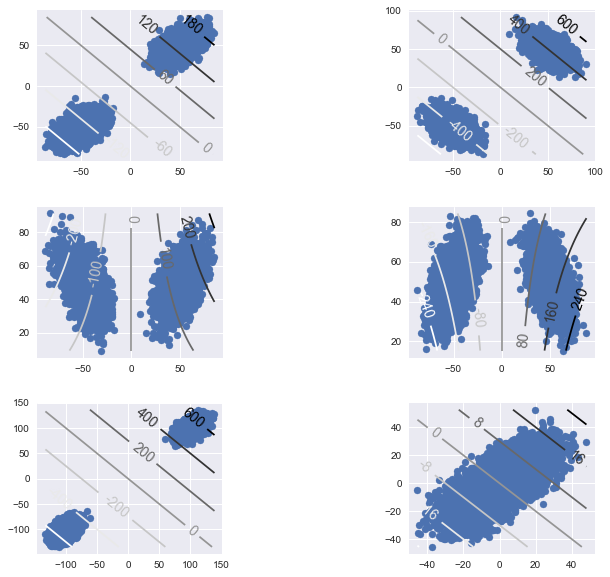

In [250]:
size = 10000


plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=1, hspace=0.3)


#1
plt.subplot(3, 2, 1)

mu1 = np.array([-50, -50])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), distribution=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#2
plt.subplot(3, 2, 2)
        
mu1 = np.array([-50, -50])
sigma1 = np.array([[100, -50], [-50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, -50], [-50, 100]])
pi2 = 1 - pi1

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), distribution=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#3
plt.subplot(3, 2, 3)
        
mu1 = np.array([-50, 50])
sigma1 = np.array([[100, -50], [-50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), distribution=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#4
plt.subplot(3, 2, 4)
        
mu1 = np.array([-50, 50])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([50, 50])
sigma2 = np.array([[100, -50], [-50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), distribution=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#5
plt.subplot(3, 2, 5)
        
mu1 = np.array([-100, -100])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([100, 100])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), distribution=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)


#6
plt.subplot(3, 2, 6)
        
mu1 = np.array([-10, -10])
sigma1 = np.array([[100, 50], [50, 100]])
pi1 = 0.5
mu2 = np.array([10, 10])
sigma2 = np.array([[100, 50], [50, 100]])
pi2 = 1 - pi1
size = 10000

XX1, XX2, T = make_data((mu1, mu2), (sigma1, sigma2), (pi1, pi2), distribution=True)

cont = plt.contour(XX1, XX2, T)
cont.clabel(fmt='%i', fontsize=14)